In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
bean_df = pd.read_excel("Dry_Bean_Dataset.xlsx")
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [30]:
bean_df.shape

(13611, 17)

In [33]:
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [31]:
bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [10]:
bean_df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

<img src="images/beans_pics.jpg">

In [18]:
bean_df_count = bean_df.groupby("Class").agg(
    class_count=("Class", "count")).reset_index().sort_values(
    "class_count", ascending=False)
bean_df_count

,Class,class_count
3,DERMASON,3546
6,SIRA,2636
5,SEKER,2027
4,HOROZ,1928
2,CALI,1630
0,BARBUNYA,1322
1,BOMBAY,522


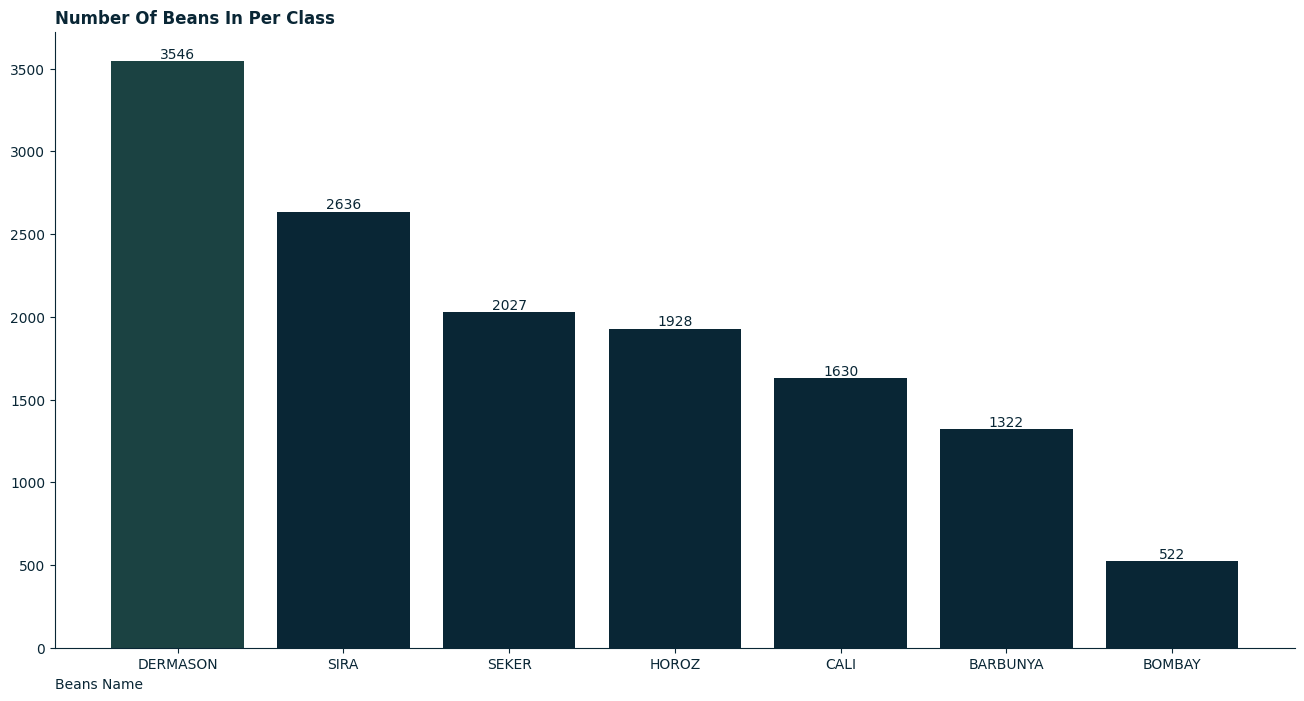

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))
clrs = ["#092635" if (x < max(bean_df_count["class_count"])) else "#1B4242"
         for x in bean_df_count["class_count"]]

ax.bar(bean_df_count["Class"], 
        bean_df_count["class_count"], color=clrs)

ax.set_title("Number Of Beans In Per Class", loc="left", color="#092635", fontweight="bold")
ax.set_xlabel("Beans Name", loc="left", color="#092635")

for bars in ax.containers:
    ax.bar_label(bars, color="#092635")
    
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("#092635")
ax.tick_params(axis='x', colors='#092635')
ax.tick_params(axis='y', colors='#092635')
plt.show()

## Modeling

### Knn

In [35]:
X = bean_df.drop("Class", axis=1).values
y = bean_df["Class"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_valid, y_valid) 

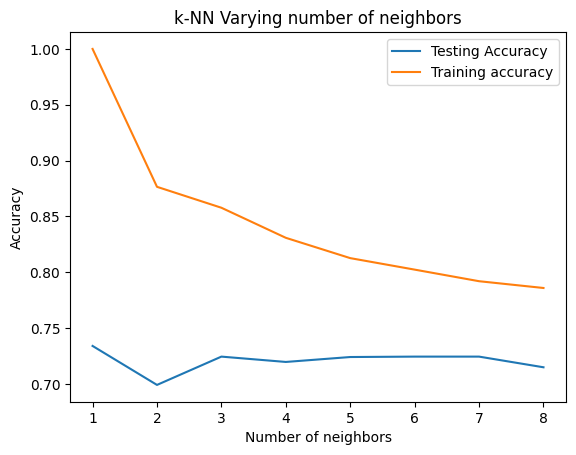

In [40]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
knn.score(X_valid,y_valid)

0.7245684906353287

In [45]:
from sklearn.metrics import confusion_matrix

In [47]:
y_pred = knn.predict(X_valid)

In [204]:
labels = ["BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SEKER","SIRA"]
cm = confusion_matrix(y_valid,y_pred, labels=labels)
print(cm)

[[127   0 100   0  26   0  12]
 [  0 104   0   0   0   0   0]
 [ 86   0 221   0  18   1   0]
 [  0   0   0 641   1  31  36]
 [ 28   0  15  14 261   0  68]
 [  1   0   0  71   6 237  91]
 [  1   0   0  67  52  25 382]]


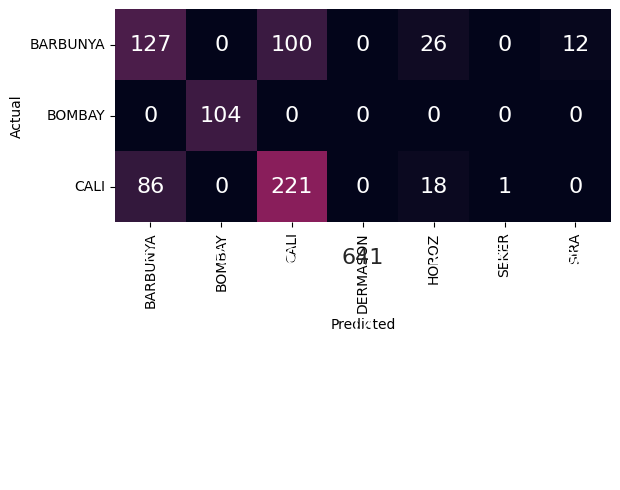

In [169]:
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, square=True, cbar=False, fmt='g')
ax.set_ylim(0, 3) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis() #optional
plt.show()

In [72]:
df_cm

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
BARBUNYA,127,0,100,0,26,0,12
BOMBAY,0,104,0,0,0,0,0
CALI,86,0,221,0,18,1,0
DERMASON,0,0,0,641,1,31,36
HOROZ,28,0,15,14,261,0,68
SEKER,1,0,0,71,6,237,91
SIRA,1,0,0,67,52,25,382


In [49]:
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA,All
True,,,,,,,,
BARBUNYA,127,0,100,0,26,0,12,265
BOMBAY,0,104,0,0,0,0,0,104
CALI,86,0,221,0,18,1,0,326
DERMASON,0,0,0,641,1,31,36,709
HOROZ,28,0,15,14,261,0,68,386
SEKER,1,0,0,71,6,237,91,406
SIRA,1,0,0,67,52,25,382,527
All,243,104,336,793,364,294,589,2723


In [50]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.52      0.48      0.50       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.66      0.68      0.67       326
    DERMASON       0.81      0.90      0.85       709
       HOROZ       0.72      0.68      0.70       386
       SEKER       0.81      0.58      0.68       406
        SIRA       0.65      0.72      0.68       527

    accuracy                           0.72      2723
   macro avg       0.74      0.72      0.73      2723
weighted avg       0.73      0.72      0.72      2723



In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [60]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [61]:
knn_cv.best_score_

0.19593683545318233

In [62]:
knn_cv.best_params_

{'n_neighbors': 49}

### Logistic Regression

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression

In [152]:
bean_log_model = LogisticRegression(solver='liblinear')

In [153]:
bean_log_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [154]:
predictions = bean_log_model.predict(X_valid)

In [155]:
confusion_matrix(y_valid, predictions)

array([[220,   0,   6,   0,   1,   3,  35],
       [  0, 102,   1,   0,   0,   1,   0],
       [  7,   0, 213,   0,  15,   2,  89],
       [  1,   0,   0, 634,   0,  15,  59],
       [  2,   0,   7,   9, 362,   0,   6],
       [ 11,   0,   0,   5,   0, 372,  18],
       [  8,   0,   3,  66,  15,   8, 427]], dtype=int64)

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, predictions)

0.8556738890929122

In [134]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X_scaled, y)

LogisticRegression()

In [137]:
predictions2 = model.predict(X_valid)

In [138]:
accuracy_score(y_valid, predictions2)

0.03819316929856775

In [157]:
feature_selector = Pipeline(steps=[("feat_selector", SelectKBest(chi2))])

In [158]:
log_reg_clf_pipeline = Pipeline(
    steps=[
        ("selector", feature_selector),
        ("model", bean_log_model),
    ]
)

In [185]:
from sklearn import set_config

set_config(display="diagram")
display(log_reg_clf_pipeline)

Pipeline(steps=[('selector',
                 Pipeline(steps=[('feat_selector',
                                  SelectKBest(score_func=<function chi2 at 0x000001E1C4A2E0C0>))])),
                ('model', LogisticRegression(solver='liblinear'))])

In [159]:
log_reg_clf_pipeline.fit(X_train, y_train)
# preds = log_reg_clf_pipeline.predict(X_test)
score = log_reg_clf_pipeline.score(X_valid, y_valid)
print(f"Model score: {score}") 

Model score: 0.8578773411678297


In [160]:
param_grid_logistic_regression = {
    "model__penalty": ["l1", "l2"],
    "model__C": np.logspace(-4, 4, 20),
    "model__solver": ["liblinear"]
}

In [161]:
from sklearn.model_selection import GridSearchCV

grid_search_logistic_regression = GridSearchCV(
    log_reg_clf_pipeline,
    param_grid=param_grid_logistic_regression,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1,
)

In [162]:
grid_search_logistic_regression.fit(X_train, y_train)

print("Best Score of train set: " + str(grid_search_logistic_regression.best_score_))
print("Best parameter set: " + str(grid_search_logistic_regression.best_params_))
print("Test Score: " + str(grid_search_logistic_regression.score(X_valid, y_valid)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Score of train set: 0.9074211020717889
Best parameter set: {'model__C': 545.5594781168514, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Test Score: 0.9030481087036357


c:\Users\amine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [163]:
y_pred_logistic = grid_search_logistic_regression.best_estimator_.predict(X_valid)

In [205]:
confusion_matrix_logistic = confusion_matrix(y_valid, y_pred_logistic)

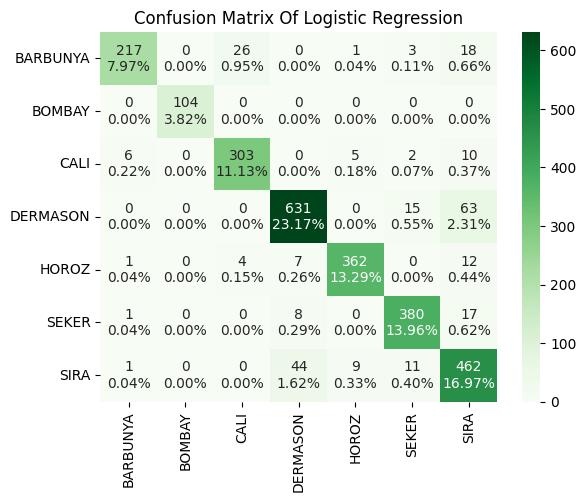

In [226]:
labels = ["BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SEKER","SIRA"]
group_names = ["BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SEKER","SIRA"]
group_counts = [
    "{0:0.0f}".format(value) for value in confusion_matrix_logistic.flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in confusion_matrix_logistic.flatten() / np.sum(confusion_matrix_logistic)
]
labels_matrix = [
    f"{v1}\n{v2}"
    for v1, v2 in zip(group_counts, group_percentages)
]
labels_matrix = np.asarray(labels_matrix).reshape(7, 7)
sns.heatmap(confusion_matrix_logistic, annot=labels_matrix, fmt="", cmap="Greens",
            xticklabels = labels, yticklabels = labels)
plt.title("Confusion Matrix Of Logistic Regression")
plt.show()

In [213]:
len(group_percentages)

49

In [214]:
labels_matrix

['BARBUNYA\n217\n7.97%',
 'BOMBAY\n0\n0.00%',
 'CALI\n26\n0.95%',
 'DERMASON\n0\n0.00%',
 'HOROZ\n1\n0.04%',
 'SEKER\n3\n0.11%',
 'SIRA\n18\n0.66%']